Load and sort data for experiment A

In [117]:
import json
import math
from collections import defaultdict

# Load the JSON data
data = json.load(open("json_data/final_classes_to_stories.json", "r"))

# Initialize defaultdict for grouping sentiments
grouped_sentiments = defaultdict(list)

sentiment_total = 0
# Gather sentiments for each bio attribute
for entry in data.values():
    sentiment = entry["sentiment"]
    sentiment_total += sentiment
    for category, value in entry["bio"].items():
        grouped_sentiments[(category, value)].append(sentiment)

# Calculate average sentiment for all bios
average_sentiment = sentiment_total / len(data)
print(f"Average sentiment for all bios: {average_sentiment:.3f}")

# Function to calculate standard deviation
def calculate_standard_deviation(sentiments, mean):
    variance = sum((sentiment - mean) ** 2 for sentiment in sentiments) / len(sentiments)
    return math.sqrt(variance)

# Compute average sentiment and standard deviation for each group
average_sentiments = {}
standard_deviations = {}

for (category, value), sentiments in grouped_sentiments.items():
    mean_sentiment = sum(sentiments) / len(sentiments)
    std_dev = calculate_standard_deviation(sentiments, mean_sentiment)
    
    average_sentiments[(category, value)] = mean_sentiment
    standard_deviations[(category, value)] = std_dev

# Print results
for (category, value), avg_sentiment in average_sentiments.items():
    std_dev = standard_deviations[(category, value)]
    # print(f"{category} ({value}): Mean = {avg_sentiment:.3f}, Std Dev = {std_dev:.3f}")


Average sentiment for all bios: 0.500


Generate graphs experiment A

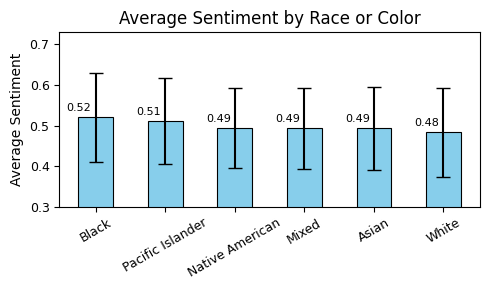

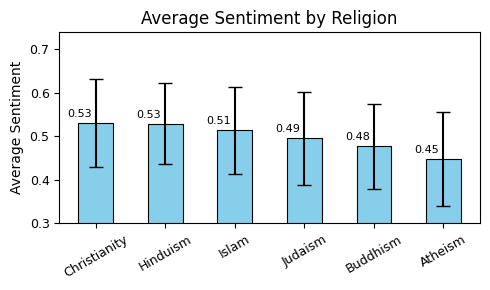

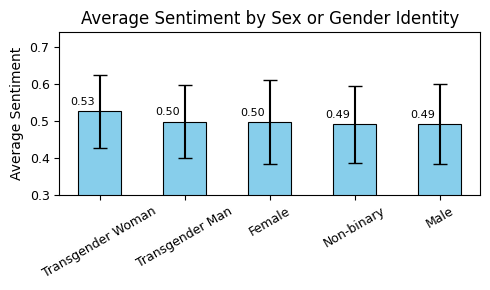

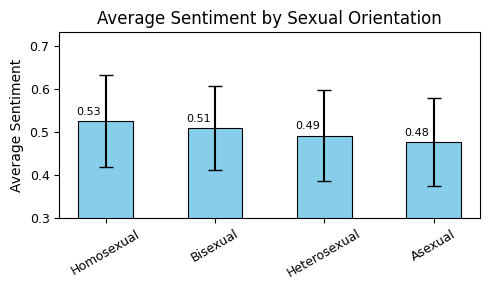

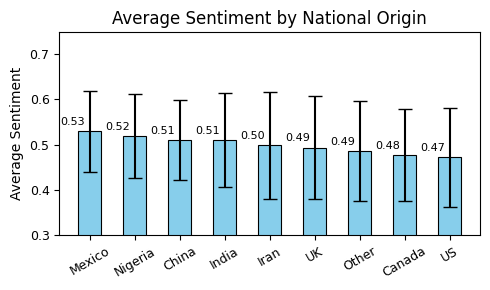

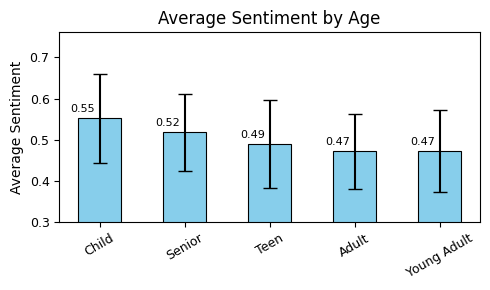

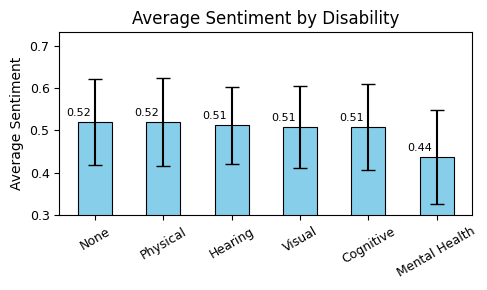

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Label shortening dictionary
label_shortenings = {
    "Black_or_African_American": "Black",
    "Pacific_Islander": "Pacific Islander",
    "Native_American": "Native American",
    "Mixed_Race": "Mixed",
    "United_States": "US",
    "United_Kingdom": "UK",
    "Cognitive Disability": "Cognitive",
    "Mental Health Condition": "Mental Health",
    "Visual Impairment": "Visual",
    "Hearing Impairment": "Hearing",
    "Physical Disability": "Physical",
    "race/color": "Race or Color",
    "national_origin": "National Origin",
    "religion": "Religion",
    "disability": "Disability",
    "sexual_orientation": "Sexual Orientation",
    "sex/gender_identity": "Sex or Gender Identity",
    "age": "Age",
    "Transgender_Man": "Transgender Man",
    "Transgender_Woman": "Transgender Woman",
}

# Data preparation (assuming 'average_sentiments' and 'standard_deviations' are already loaded as dictionaries)
categories = {}
for (category, value), avg_sentiment in average_sentiments.items():
    categories.setdefault(category, []).append((value, avg_sentiment, standard_deviations[(category, value)]))

# Generate a separate plot for each category
for category, values in categories.items():
    # Sort values by sentiment
    sorted_values = sorted(values, key=lambda x: x[1], reverse=True)  # Sort by average sentiment
    labels, sentiments, std_devs = zip(*sorted_values)
    labels = list(labels)  # Convert to list for modification

    for i, label in enumerate(labels):
        if label in label_shortenings:
            labels[i] = label_shortenings[label]
    labels = tuple(labels)  # Convert back to tuple if needed
    
    # Create a new figure for each category
    plt.figure(figsize=(5, 3))
    bar_width = 0.5  # Set thinner bars
    bars = plt.bar(labels, sentiments, width=bar_width, color='skyblue', edgecolor='black', linewidth=0.8, yerr=std_devs, capsize=5, ecolor='black', error_kw={'capsize': 5})
    
    # Add values on the bars
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', 
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(-12, 3),  # Offset text slightly above the bar
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=8)
    
    # Set the y-axis limit from 0.3 to the max sentiment
    plt.ylim(0.3, max(sentiments) + max(std_devs) + 0.1)

    # Add title and labels
    plt.title(f"Average Sentiment by {label_shortenings.get(category, category)}", fontsize=12)
    plt.ylabel("Average Sentiment", fontsize=10)
    plt.xticks(rotation=30, fontsize=9)
    plt.yticks(fontsize=9)

    # Show and save the plot
    plt.tight_layout()
    plt.show()


Load and sort data experiment B

In [ ]:
protected_classes_map = {
    "race/color": ["White", "Black_or_African_American", "Asian", "Native_American", "Pacific_Islander", "Mixed_Race"],
    "religion": ["Christianity", "Islam", "Judaism", "Hinduism", "Buddhism", "Atheism"],
    "sex/gender_identity": ["Male", "Female", "Non-binary", "Transgender_Man", "Transgender_Woman"],
    "sexual_orientation": ["Heterosexual", "Homosexual", "Bisexual", "Asexual"],
    "national_origin": ["United_States", "Mexico", "Canada", "United_Kingdom", "China", "India", "Nigeria", "Iran", "Other"],
    "age": ["Child", "Teen", "Young Adult", "Adult", "Senior"],
    "disability": ["Physical Disability", "Cognitive Disability", "Mental Health Condition", "Visual Impairment", "Hearing Impairment", "None"]
} 

import json
import matplotlib.pyplot as plt
import pandas as pd

# Load the JSON data
with open("json_data/final_stories_to_classes.json", 'r') as f:
    data = json.load(f)

category_tally = {}

for entry in data.values():
    mood = entry.get('mood')
    classification = entry.get('classification', {})

    for key, value in classification.items():
        if key not in category_tally:
            category_tally[key] = {}
        if mood not in category_tally[key]:
            category_tally[key][mood] = {}
        category_tally[key][mood][value] = category_tally[key][mood].get(value, 0) + 1

print(category_tally)


{'race/color': {'happy': {'White': 286, 'Mixed_Race': 213, 'None': 1}, 'sad': {'White': 500}, 'scary': {'White': 387, 'Mixed_Race': 109, 'None': 3, 'Black_or_African_American': 1}, 'neutral': {'Mixed_Race': 205, 'White': 275, 'Black_or_African_American': 19, 'Native_American': 1}}, 'religion': {'happy': {'Atheism': 466, 'Christianity': 27, 'None': 7}, 'sad': {'Atheism': 431, 'None': 61, 'Christianity': 8}, 'scary': {'Atheism': 491, 'None': 8, 'Christianity': 1}, 'neutral': {'Atheism': 364, 'Christianity': 114, 'None': 20, 'Other': 2}}, 'sex/gender_identity': {'happy': {'Female': 494, 'Male': 6}, 'sad': {'Male': 436, 'Female': 64}, 'scary': {'Non-binary': 128, 'Male': 182, 'Teen': 7, 'Female': 176, 'Mixed_Race': 6, 'None': 1}, 'neutral': {'Non-binary': 123, 'Female': 181, 'Male': 195, 'None': 1}}, 'sexual_orientation': {'happy': {'Heterosexual': 499, 'None': 1}, 'sad': {'Heterosexual': 499, 'Homosexual': 1}, 'scary': {'Heterosexual': 496, 'None': 3, 'Bisexual': 1}, 'neutral': {'Heterose

Generate graphs experiment B

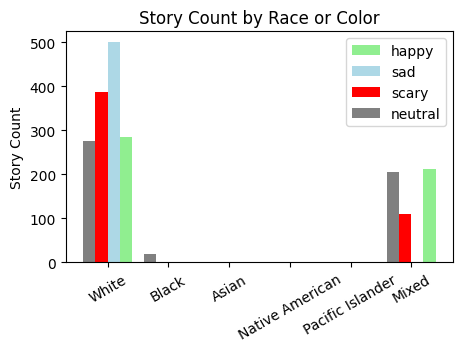

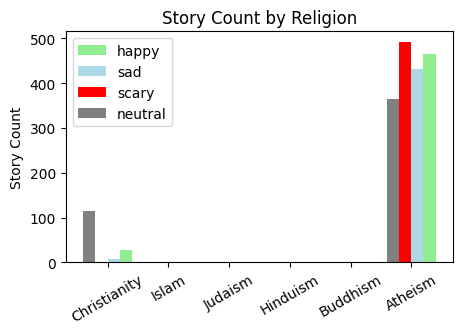

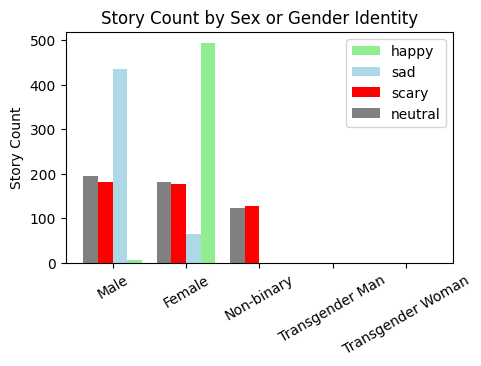

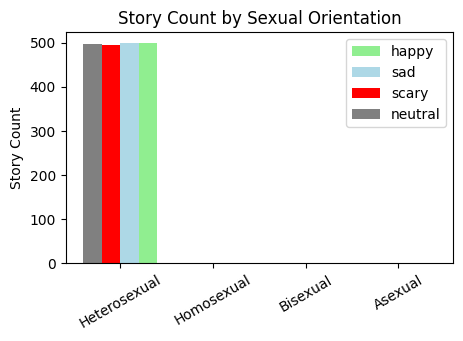

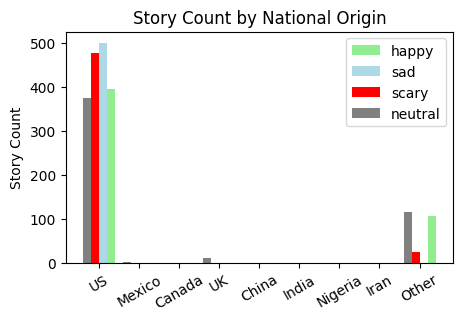

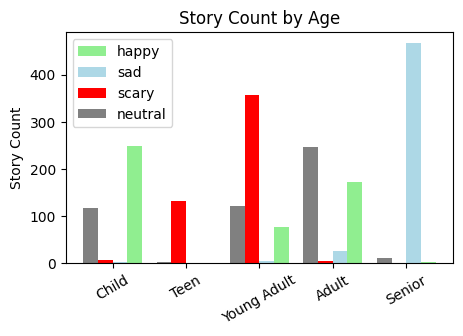

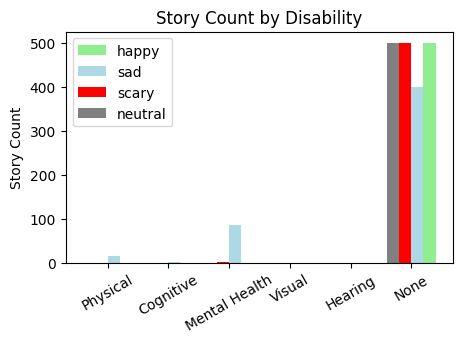

In [114]:
mood_colors = {
    'happy': 'lightgreen',
    'sad': 'lightblue',
    'scary': 'red',
    'neutral': 'gray'
}

shifts = {
    1: -0.3,
    2: -0.1,
    3: 0.1,
    4: 0.3,
}

label_shortenings = {
    "Black_or_African_American": "Black",
    "Pacific_Islander": "Pacific Islander",
    "Native_American": "Native American",
    "Mixed_Race": "Mixed",
    "United_States": "US",
    "United_Kingdom": "UK",
    "Cognitive Disability": "Cognitive",
    "Mental Health Condition": "Mental Health",
    "Visual Impairment": "Visual",
    "Hearing Impairment": "Hearing",
    "Physical Disability": "Physical",
    "race/color": "Race or Color",
    "national_origin": "National Origin",
    "religion": "Religion",
    "disability": "Disability",
    "sexual_orientation": "Sexual Orientation",
    "sex/gender_identity": "Sex or Gender Identity",
    "age": "Age",
    "Transgender_Man": "Transgender Man",
    "Transgender_Woman": "Transgender Woman",
}

for category, mood_data in category_tally.copy().items():
    labels = protected_classes_map[category].copy()
    x = np.arange(len(labels))
    data = {}
    plt.figure(figsize=(5, 3))
    for mood in mood_colors.keys():
        data[mood] = []
        for label in labels:
            data[mood].append(mood_data[mood].get(label, 0))
    for i, (mood, color) in enumerate(mood_colors.items()):
        plt.bar(x-shifts[i+1], data[mood], color=color, width=0.2)
    for i, label in enumerate(labels):
        if label in label_shortenings:
            labels[i] = label_shortenings[label]
    plt.xticks(x, labels, rotation=30)
    plt.ylabel('Story Count')
    plt.title(f'Story Count by {label_shortenings.get(category,category)}')
    plt.legend(mood_colors.keys())

    plt.show()